In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict

In [2]:
sp.init_printing(use_unicode=True)

### 待求解信息

In [3]:
T = sp.var('T')
t = sp.var('t')
u_best = sp.Function('u*')(t)
p_best = sp.Function('p*')(t)
v_best = sp.Function('v*')(t)
display(T)
display(u_best)
display(p_best)
display(v_best)

### 已知信息
1. System equation
2. Cost Function
3. Boundary Values

In [4]:
print('System Equation：')
p = sp.Function('p')(t)
v = sp.Function('v')(t)
u = sp.Function('u')(t)
se = sp.Eq(sp.Matrix([sp.diff(p, (t, 1)), sp.diff(v, (t, 1))]), sp.Matrix([v, u]))
display(se)

System Equation：


⎡d       ⎤         
⎢──(p(t))⎥         
⎢dt      ⎥   ⎡v(t)⎤
⎢        ⎥ = ⎢    ⎥
⎢d       ⎥   ⎣u(t)⎦
⎢──(v(t))⎥         
⎣dt      ⎦         

Cost Function: 


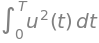

In [5]:
print('Cost Function: ')
Jk = sp.integrate(u**2, (t, 0, T))
display(Jk)

In [6]:
print("Boundary Values")
p0, v0, a0 = sp.var('p_0, v_0, a_0')
p1, v1, a1 = sp.var('p_1, v_1, a_1')
display(p0, v0, a0, p1, v1, a1)

Boundary Values


In [7]:
print(' Pontryagin minimum principle : ')

 Pontryagin minimum principle : 


In [8]:
print('costate')
λ1 = sp.Function('λ_1')(t) 
λ2 = sp.Function('λ_2')(t)
λ = sp.Matrix([λ1, λ2])
s = sp.Matrix([p, v])
λ

costate


⎡λ₁(t)⎤
⎢     ⎥
⎣λ₂(t)⎦

In [9]:
print('Hamiltonian function')
H = (1/T)*u**2+λ1*v+λ2*u
H

Hamiltonian function


#### Theorem 1:

Start 1. solution λ(t)...


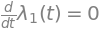

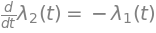

In [10]:
print('Start 1. solution λ(t)...')
eq = sp.Eq(sp.diff(λ, (t, 1)), -sp.diff(H, (s, 1)))
l1 = sp.Eq(eq.args[0][0], eq.args[1][0])
display(l1)
a = sp.Symbol('a')
l2 = sp.Eq(eq.args[0][1], eq.args[1][1])
display(l2)
# display(λ)

In [11]:
# constant
a, b = sp.var('a b')
λ1, λ2 = sp.var('λ1 λ2')
display(sp.Eq(λ1, 2 * a / T))
display(sp.Eq(λ2, (2 * a * t + 2 * b) / T))
λ1 = 2 * a / T
λ2 = (2 * a * t + 2 * b) / T

#### Theorem 2

In [12]:
c, d = sp.var('c d')
display(sp.Eq(u_best, a * t + b))
display(sp.Eq(v_best, a * t**2 / 2 + b * t + c))
display(sp.Eq(c, v0))
display(sp.Eq(p_best, a * t**3 / 6 + b * t**2 / 2 + c*t + d))
display(sp.Eq(d, p0))

In [13]:
v0, vt = sp.var('v_0 v_t')
p0, pt = sp.var('p_0, p_t')
T = sp.var('T')

dp = sp.Symbol('Δp')
display(sp.Eq(dp, (pt-v0*T+p0)))
dp = pt-v0*T+p0

dv = sp.Symbol('Δv')
display(sp.Eq(dv, (-v0+vt)))
dv = vt - v0

⎡-12   6  ⎤
⎢────  ── ⎥
⎢  3    2 ⎥
⎢ T    T  ⎥
⎢         ⎥
⎢ 6    -2 ⎥
⎢ ──   ───⎥
⎢  2    T ⎥
⎣ T       ⎦

⎡-T⋅v₀ + p₀ + pₜ⎤
⎢               ⎥
⎣   -v₀ + vₜ    ⎦

⎡-12   6  ⎤                  
⎢────  ── ⎥                  
⎢  3    2 ⎥                  
⎢ T    T  ⎥ ⎡-T⋅v₀ + p₀ + pₜ⎤
⎢         ⎥⋅⎢               ⎥
⎢ 6    -2 ⎥ ⎣   -v₀ + vₜ    ⎦
⎢ ──   ───⎥                  
⎢  2    T ⎥                  
⎣ T       ⎦                  

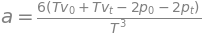

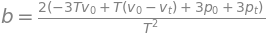

In [14]:
m1 = sp.Matrix([[-12, 6*T], [6*T, -2*T*T]]) / T**3
m2 = sp.Matrix([dp, dv])
display(m1)
display(m2)
a, b = m1 * m2
d = sp.MatMul(m1, m2)
display(d)
display(sp.Eq(sp.Symbol('a'), sp.simplify(a)))
display(sp.Eq(sp.Symbol('b'), sp.simplify(b)))

#### Solve Cost FUnction

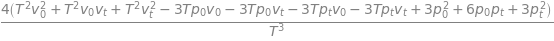

In [15]:
J = a*a*T**3/3 + a*b*T**2 + b*b*T
display(sp.simplify(J))

#### Derivation for Cost Function

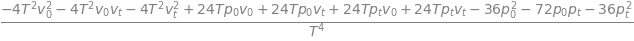

In [19]:
dJ = sp.diff(J, (T, 1))
display(sp.simplify(dJ))

In [20]:
c1, c2, c3, t = sp.var('c_1, c_2, c_3, t')
f = sp.Function('f')(t)
f = c1 * t**4 + c2 * t**3 + c3 * t**2
display(f)
c1 = -36 * (p0 - pt)**2
c2 = 24 * (v0 + vt) * (p0 + pt)
c3 = 4 * (v0*v0 + v0*vt + vt*vt)
f = c1 * t**4 + c2 * t**3 + c3 * t**2
display(f)

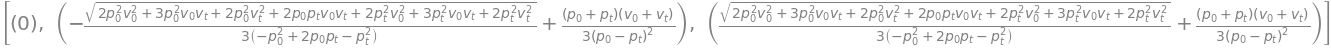

In [21]:
eq = sp.Eq(f, 0)
display(sp.solve([eq], t))